## CFD Code Development Using JULIA
This is the literal translation of CFD Python by Prof. Barbara

In [4]:
using Plots

In [5]:
nx = 150 # then try to change this to more than 161
l = 8 # length of the domain
dx = l / (nx-1)
nt = 200 # number of timesteps
dt = 0.025 # stepsize
c = 1 # wave speed in the simple convection equation

1

In [6]:
# u_0 is defined as a step function
u = ones(nx)
u[convert(Integer, round(0.5/dx)): convert(Integer, round(1/dx + 1))] .= 2;

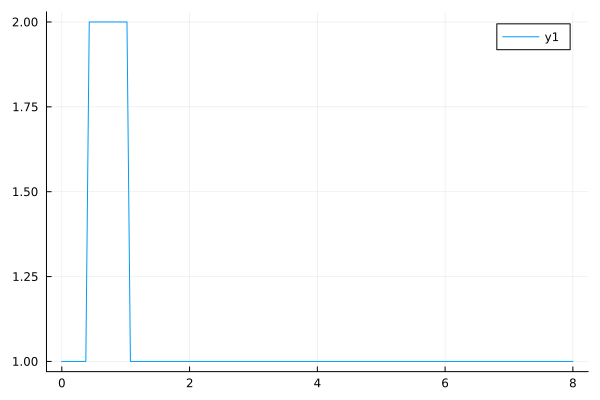

In [7]:
plot(LinRange(0,l,nx), u)

In [8]:
un = ones(nt,nx)
un[1, :] = copy(u)
for n in 1:nt-1, i in 2:nx
    un[n+1,i] = un[n, i] - c * dt / dx * (un[n, i] - un[n,i-1])
end

┌ Info: Saved animation to /home/fuad/MyCodes/Julia/CFDJulia/tmp.gif
└ @ Plots /home/fuad/.julia/packages/Plots/qgrW8/src/animation.jl:149


Plots.AnimatedGif("/home/fuad/MyCodes/Julia/CFDJulia/tmp.gif")
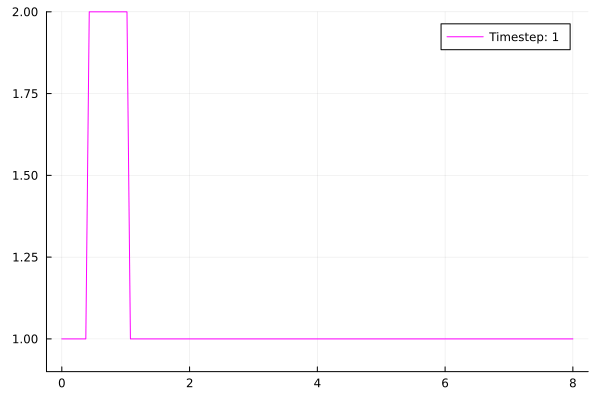

In [9]:
@gif for n ∈ 1:nt
    plot(LinRange(0,l,nx), un[n,:], label="Timestep: $n", ylims=(0.9,2), linecolor = :magenta)
    
end
# notice numerical diffusion